# NYC Crime and Events Analysis (2022-2024)

Comprehensive analysis of NYC arrests and events data for crime patterns and correlations.

In [1]:
# Import libraries
from sodapy import Socrata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

In [36]:
# Initialize API client
client = Socrata("data.cityofnewyork.us", None, timeout=120)

# Target crime types
target_offenses = [
    "ROBBERY", 
    "ASSAULT 3 & RELATED OFFENSES", 
    # "OFFENSES AGAINST PUBLIC SAFETY",
    # "KIDNAPPING & RELATED OFFENSES", 
    # "THEFT-FRAUD"x
    "PETIT LARCENY",
    "DANGEROUS DRUGS",
    "CRIMINAL TRESPASS",
]

print("🎯 Target Crime Types:")
for i, offense in enumerate(target_offenses, 1):
    print(f"   {i}. {offense}")

🎯 Target Crime Types:
   1. ROBBERY
   2. ASSAULT 3 & RELATED OFFENSES
   3. PETIT LARCENY
   4. DANGEROUS DRUGS
   5. CRIMINAL TRESPASS


In [ ]:
# Load Arrests Data for 2022-2024
print("📥 Loading Arrests Data (2022-2024)...")

# Use the correct dataset ID for arrests
arrests_results = client.get(
    "8h9b-rp9u",  # NYC Arrests dataset
    where="arrest_date >= '2022-01-01T00:00:00.000' AND arrest_date < '2025-01-01T00:00:00.000'",
    limit=500000
)



📥 Loading Arrests Data (2022-2024)...
✅ Loaded 500,000 arrest records
✅ Loaded 500,000 arrest records
✅ Filtered to 102,121 records for target crimes
📅 Date Range: 2022-01-01 00:00:00 to 2024-04-29 00:00:00
📊 Year Distribution:
   • 2022: 40,978 arrests
   • 2023: 45,305 arrests
   • 2024: 15,838 arrests
✅ Filtered to 102,121 records for target crimes
📅 Date Range: 2022-01-01 00:00:00 to 2024-04-29 00:00:00
📊 Year Distribution:
   • 2022: 40,978 arrests
   • 2023: 45,305 arrests
   • 2024: 15,838 arrests


In [37]:
df_arrests = pd.DataFrame.from_records(arrests_results)
print(f"✅ Loaded {len(df_arrests):,} arrest records")

# Process dates
df_arrests["arrest_date"] = pd.to_datetime(df_arrests["arrest_date"])

# Filter for target offenses
df_arrests_filtered = df_arrests[df_arrests["ofns_desc"].isin(target_offenses)].copy()
print(f"✅ Filtered to {len(df_arrests_filtered):,} records for target crimes")

# Show date range and year distribution
print(f"📅 Date Range: {df_arrests_filtered['arrest_date'].min()} to {df_arrests_filtered['arrest_date'].max()}")
print(f"📊 Year Distribution:")
year_counts = df_arrests_filtered['arrest_date'].dt.year.value_counts().sort_index()
for year, count in year_counts.items():
    print(f"   • {year}: {count:,} arrests")

✅ Loaded 500,000 arrest records
✅ Filtered to 191,409 records for target crimes
📅 Date Range: 2022-01-01 00:00:00 to 2024-04-29 00:00:00
📊 Year Distribution:
   • 2022: 73,548 arrests
   • 2023: 86,456 arrests
   • 2024: 31,405 arrests
✅ Filtered to 191,409 records for target crimes
📅 Date Range: 2022-01-01 00:00:00 to 2024-04-29 00:00:00
📊 Year Distribution:
   • 2022: 73,548 arrests
   • 2023: 86,456 arrests
   • 2024: 31,405 arrests


In [28]:
df_arrests["ofns_desc"].unique() 

array(['ASSAULT 3 & RELATED OFFENSES', 'CRIMINAL MISCHIEF & RELATED OF',
       'FELONY ASSAULT', 'OFFENSES AGAINST THE PERSON', 'GRAND LARCENY',
       'DANGEROUS WEAPONS', 'PETIT LARCENY',
       'INTOXICATED & IMPAIRED DRIVING', 'SEX CRIMES', 'BURGLARY',
       'OFFENSES AGAINST PUBLIC ADMINI', 'MISCELLANEOUS PENAL LAW',
       'OFFENSES AGAINST PUBLIC SAFETY', 'OFFENSES INVOLVING FRAUD',
       'OFF. AGNST PUB ORD SENSBLTY &', 'NYS LAWS-UNCLASSIFIED FELONY',
       'ROBBERY', 'FORGERY', 'VEHICLE AND TRAFFIC LAWS',
       'ALCOHOLIC BEVERAGE CONTROL LAW', 'CRIMINAL TRESPASS',
       'DANGEROUS DRUGS', 'OTHER TRAFFIC INFRACTION',
       'MURDER & NON-NEGL. MANSLAUGHTE', 'ENDAN WELFARE INCOMP',
       'INTOXICATED/IMPAIRED DRIVING', 'DISORDERLY CONDUCT',
       'UNAUTHORIZED USE OF A VEHICLE', 'OTHER OFFENSES RELATED TO THEF',
       'RAPE', 'ADMINISTRATIVE CODE', 'GRAND LARCENY OF MOTOR VEHICLE',
       'FRAUDS', 'POSSESSION OF STOLEN PROPERTY', '(null)',
       'FOR OTHER AUTHORITIE

In [ ]:
# Load Events Data for 2022-2024
print("📥 Loading Events Data (2022-2024)...")

# Use the correct dataset ID for events
events_results = client.get(
    "bkfu-528j",  # NYC Events dataset
    where="start_date_time >= '2022-01-01T00:00:00.000' AND start_date_time < '2025-01-01T00:00:00.000'",
    limit=10000000
)



📥 Loading Events Data (2022-2024)...
✅ Loaded 10,000,000 event records
✅ Loaded 10,000,000 event records
📅 Date Range: 2022-01-01 00:00:00 to 2024-08-02 15:00:00
📊 Year Distribution:
📅 Date Range: 2022-01-01 00:00:00 to 2024-08-02 15:00:00
📊 Year Distribution:
   • 2022: 3,935,630 events
   • 2023: 4,427,094 events
   • 2024: 1,637,276 events
   • 2022: 3,935,630 events
   • 2023: 4,427,094 events
   • 2024: 1,637,276 events

🎯 Final Datasets:
   • Arrests (Target Crimes): 102,121 records
   • Events (All Types): 10,000,000 records

🎯 Final Datasets:
   • Arrests (Target Crimes): 102,121 records
   • Events (All Types): 10,000,000 records


In [34]:
df_events = pd.DataFrame.from_records(events_results)
print(f"✅ Loaded {len(df_events):,} event records")

# Process dates
if "start_date_time" in df_events.columns:
    df_events["start_date_time"] = pd.to_datetime(df_events["start_date_time"], errors="coerce")
    
    # Show date range and year distribution
    print(f"📅 Date Range: {df_events['start_date_time'].min()} to {df_events['start_date_time'].max()}")
    print(f"📊 Year Distribution:")
    event_year_counts = df_events['start_date_time'].dt.year.value_counts().sort_index()
    for year, count in event_year_counts.items():
        print(f"   • {year}: {count:,} events")

if "end_date_time" in df_events.columns:
    df_events["end_date_time"] = pd.to_datetime(df_events["end_date_time"], errors="coerce")

print(f"\n🎯 Final Datasets:")
print(f"   • Arrests (Target Crimes): {len(df_arrests_filtered):,} records")
print(f"   • Events (All Types): {len(df_events):,} records")

✅ Loaded 10,000,000 event records
📅 Date Range: 2022-01-01 00:00:00 to 2024-08-02 15:00:00
📊 Year Distribution:
📅 Date Range: 2022-01-01 00:00:00 to 2024-08-02 15:00:00
📊 Year Distribution:
   • 2022: 3,935,630 events
   • 2023: 4,427,094 events
   • 2024: 1,637,276 events
   • 2022: 3,935,630 events
   • 2023: 4,427,094 events
   • 2024: 1,637,276 events

🎯 Final Datasets:
   • Arrests (Target Crimes): 154,365 records
   • Events (All Types): 10,000,000 records

🎯 Final Datasets:
   • Arrests (Target Crimes): 154,365 records
   • Events (All Types): 10,000,000 records


In [33]:
df_events

,event_id,event_name,start_date_time,end_date_time,event_agency,event_type,event_borough,event_location,street_closure_type,community_board,police_precinct,event_street_side,event_day_of_week
0,610400,"Diana Ross Lawn Winter Closure Nov. 29, 2021 -...",2022-01-01 00:00:00,2022-01-01 23:59:00,Parks Department,Special Event,Manhattan,Central Park: Diana Ross Playground Lawn,N/A,"64,","22,",NaN,Saturday
1,610380,"Frisbee Hill Winter Closure Nov. 29, 2021 - Ap...",2022-01-01 00:00:00,2022-01-01 23:59:00,Parks Department,Special Event,Manhattan,Central Park: Frisbee Hill,N/A,"64,","22,",NaN,Saturday
2,610159,"Cedar Hill Winter Closure Nov 15, 2021 - April...",2022-01-01 00:00:00,2022-01-01 23:59:00,Parks Department,Special Event,Manhattan,Central Park: Cedar Hill,N/A,"64,","22,",NaN,Saturday
3,610152,Great Hill Winter Closure 11-1-2021 - 5-1-2022,2022-01-01 00:00:00,2022-01-01 23:59:00,Parks Department,Special Event,Manhattan,Central Park: Great Hill Oval,N/A,"64,","22,",NaN,Saturday
4,610373,"Dana Discovery Lawn Winter Closure Oct. 31, 20...",2022-01-01 00:00:00,2022-01-01 23:59:00,Parks Department,Special Event,Manhattan,Central Park: Dana Discovery Center Lawn,N/A,"64,","22,",NaN,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999995,754273,Volleyball,2024-08-02 15:00:00,2024-08-02 19:00:00,Parks Department,Sport - Adult,Queens,Flushing Meadows Corona Park: Volleyball-03,N/A,"81,","110,",NaN,Friday
9999996,760931,Soccer -Regulation,2024-08-02 15:00:00,2024-08-02 18:00:00,Parks Department,Sport - Youth,Manhattan,"Thomas Jefferson Park: Soccer-01 ,Booker T. Wa...",N/A,"03, 07, 09, 11, 12, 3, 6,","17, 23, 24, 25, 30, 33, 34, 5, 9,",NaN,Friday
9999997,785736,Basketball,2024-08-02 15:00:00,2024-08-02 21:00:00,Parks Department,Sport - Youth,Manhattan,Morningside Park: Morningside Plgd-Basketball-02,N/A,"09,","26,",NaN,Friday
9999998,760170,Softball (Little league),2024-08-02 15:00:00,2024-08-02 19:00:00,Parks Department,Sport - Youth,Manhattan,Peter's Field: Softball-01,N/A,"06,","13,",NaN,Friday


📊 Creating Crime Analysis Plots...


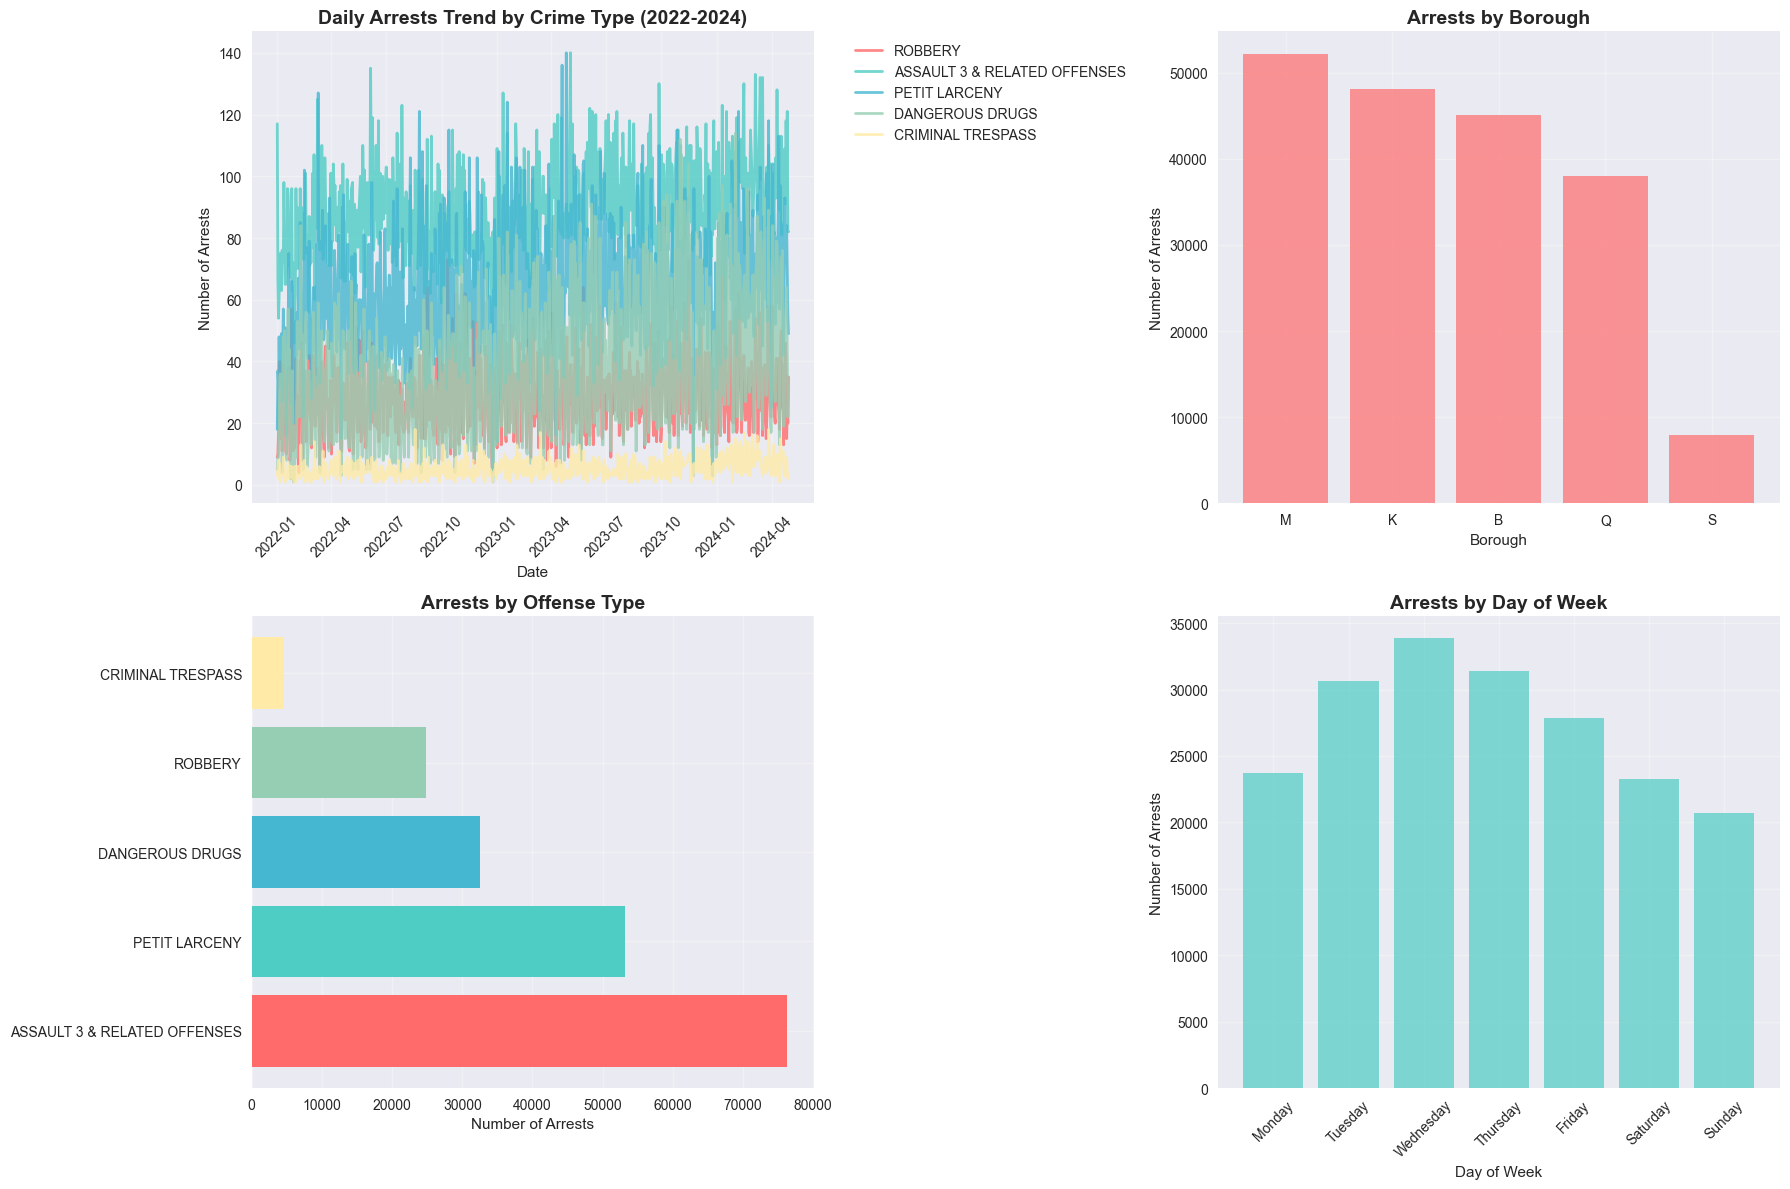

In [38]:
# Crime Analysis Visualizations
print("📊 Creating Crime Analysis Plots...")

# Define colors for consistent styling
crime_colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']

# Create main analysis dashboard
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1. Daily arrests trend by offense type
for i, offense in enumerate(target_offenses):
    offense_data = df_arrests_filtered[df_arrests_filtered['ofns_desc'] == offense]
    if len(offense_data) > 0:
        daily_arrests_by_offense = offense_data.groupby(offense_data['arrest_date'].dt.date).size()
        axes[0,0].plot(daily_arrests_by_offense.index, daily_arrests_by_offense.values, 
                      label=offense, color=crime_colors[i % len(crime_colors)], alpha=0.8, linewidth=2)

axes[0,0].set_title('Daily Arrests Trend by Crime Type (2022-2024)', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Date')
axes[0,0].set_ylabel('Number of Arrests')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
axes[0,0].grid(True, alpha=0.3)

# 2. Arrests by borough
borough_counts = df_arrests_filtered['arrest_boro'].value_counts()
axes[0,1].bar(borough_counts.index, borough_counts.values, color='#FF6B6B', alpha=0.7)
axes[0,1].set_title('Arrests by Borough', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Borough')
axes[0,1].set_ylabel('Number of Arrests')
axes[0,1].grid(True, alpha=0.3)

# 3. Arrests by offense type
offense_counts = df_arrests_filtered['ofns_desc'].value_counts()
axes[1,0].barh(offense_counts.index, offense_counts.values, color=crime_colors[:len(offense_counts)])
axes[1,0].set_title('Arrests by Offense Type', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Number of Arrests')
axes[1,0].grid(True, alpha=0.3)

# 4. Arrests by day of week
df_arrests_filtered['day_of_week'] = df_arrests_filtered['arrest_date'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = df_arrests_filtered['day_of_week'].value_counts().reindex(day_order)
axes[1,1].bar(day_counts.index, day_counts.values, color='#4ECDC4', alpha=0.7)
axes[1,1].set_title('Arrests by Day of Week', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Day of Week')
axes[1,1].set_ylabel('Number of Arrests')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

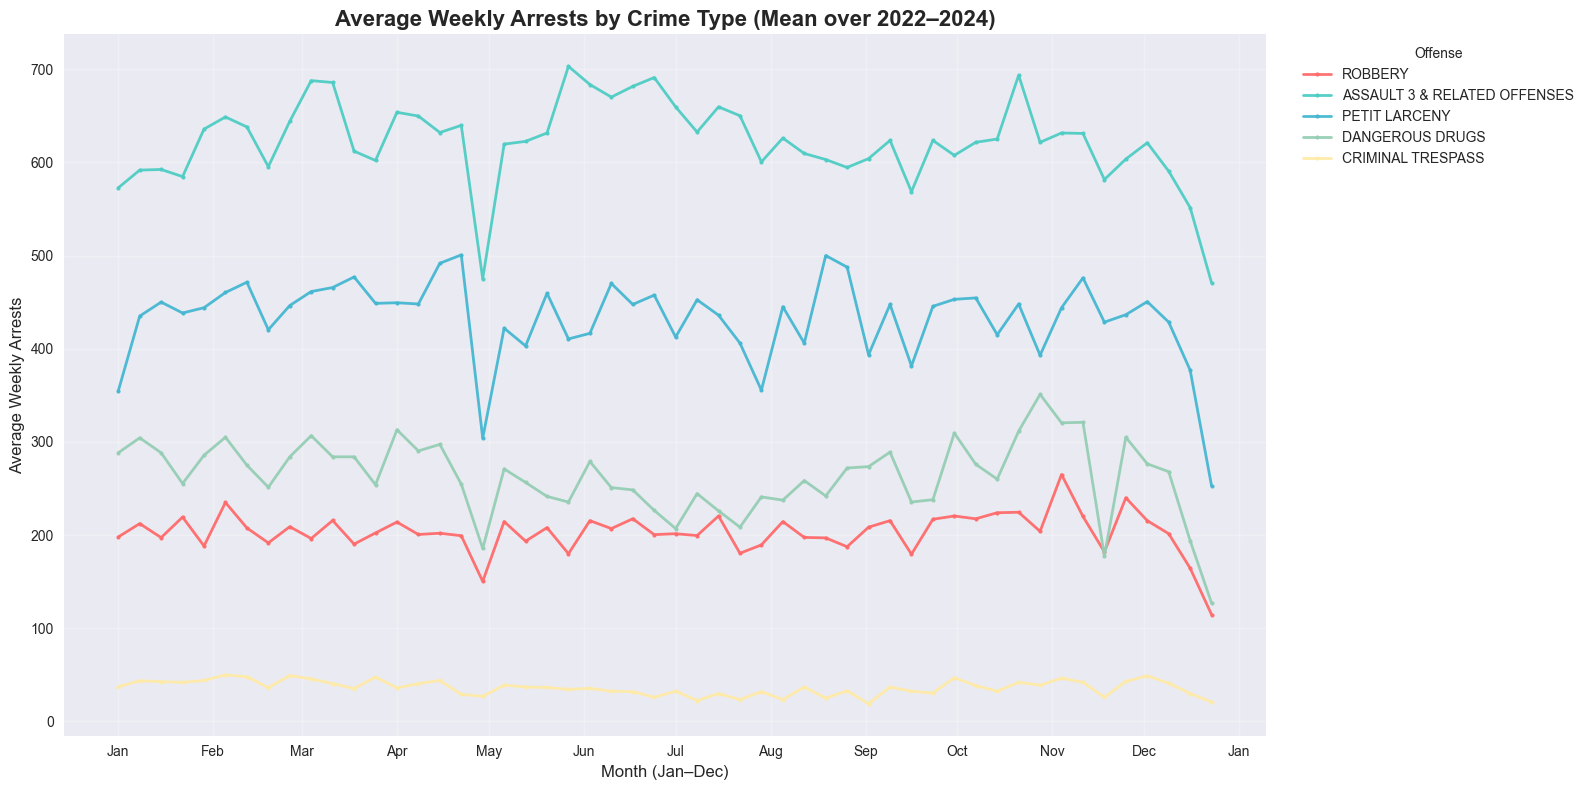

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Sicherstellen: arrest_date ist datetime
df = df_arrests_filtered.copy()
df['arrest_date'] = pd.to_datetime(df['arrest_date'], errors='coerce')

# ISO-Jahr/Woche berechnen
iso = df['arrest_date'].dt.isocalendar()
df['iso_year'] = iso.year
df['iso_week'] = iso.week

# Nur Wochen 1..52 verwenden
df = df[df['iso_week'] <= 52]

# Referenz-Datenachse: Montags der ISO-Woche in 2024 (nur für Labels)
week_dates = [pd.Timestamp.fromisocalendar(2024, w, 1) for w in range(1, 53)]

fig, ax = plt.subplots(figsize=(16, 8))

for i, offense in enumerate(target_offenses):
    sub = df[df['ofns_desc'] == offense]

    # Zählungen pro (Jahr, Woche)
    weekly_counts = (
        sub.groupby(['iso_year', 'iso_week'])
           .size()
           .reset_index(name='arrests')
    )

    if weekly_counts.empty:
        continue

    # Durchschnitt über die Jahre je Woche
    avg_by_week = (
        weekly_counts.groupby('iso_week')['arrests']
        .mean()
        .reindex(range(1, 53))
    )

    ax.plot(
        week_dates,
        avg_by_week.values,
        label=offense,
        color=crime_colors[i % len(crime_colors)],
        linewidth=2,
        marker='o',
        markersize=3,
        alpha=0.95
    )

# Styling
ax.set_title('Average Weekly Arrests by Crime Type (Mean over 2022–2024)', fontsize=16, fontweight='bold')
ax.set_xlabel('Month (Jan–Dec)', fontsize=12)
ax.set_ylabel('Average Weekly Arrests', fontsize=12)

# Monats-Ticks/Labels
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # <<< korrigiert

plt.setp(ax.get_xticklabels(), rotation=0)

# Legende außen
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', frameon=False, title='Offense')

ax.grid(True, alpha=0.25)
plt.tight_layout()
plt.show()


In [51]:
# Wie weit reichen die Daten?
print("Max arrest_date:", df_arrests_filtered['arrest_date'].max())

iso = df_arrests_filtered['arrest_date'].dt.isocalendar()
tmp = (df_arrests_filtered.assign(iso_year=iso.year, iso_week=iso.week)
       .query("iso_week >= 50 or iso_week <= 1")
       .groupby(['iso_year','iso_week','ofns_desc'])
       .size().reset_index(name='n')
       .sort_values(['iso_year','iso_week']))
print(tmp.tail(30))  # letzte Wochen ansehen


Max arrest_date: 2024-04-29 00:00:00
    iso_year  iso_week                     ofns_desc    n
20      2022        52  ASSAULT 3 & RELATED OFFENSES  576
21      2022        52             CRIMINAL TRESPASS   28
22      2022        52               DANGEROUS DRUGS  189
23      2022        52                 PETIT LARCENY  383
24      2022        52                       ROBBERY  166
25      2023         1  ASSAULT 3 & RELATED OFFENSES  586
26      2023         1             CRIMINAL TRESPASS   40
27      2023         1               DANGEROUS DRUGS  332
28      2023         1                 PETIT LARCENY  419
29      2023         1                       ROBBERY  218
30      2023        50  ASSAULT 3 & RELATED OFFENSES  650
31      2023        50             CRIMINAL TRESPASS   41
32      2023        50               DANGEROUS DRUGS  294
33      2023        50                 PETIT LARCENY  486
34      2023        50                       ROBBERY  195
35      2023        51  ASSAULT 3 &

📊 Creating Events Analysis Plots...


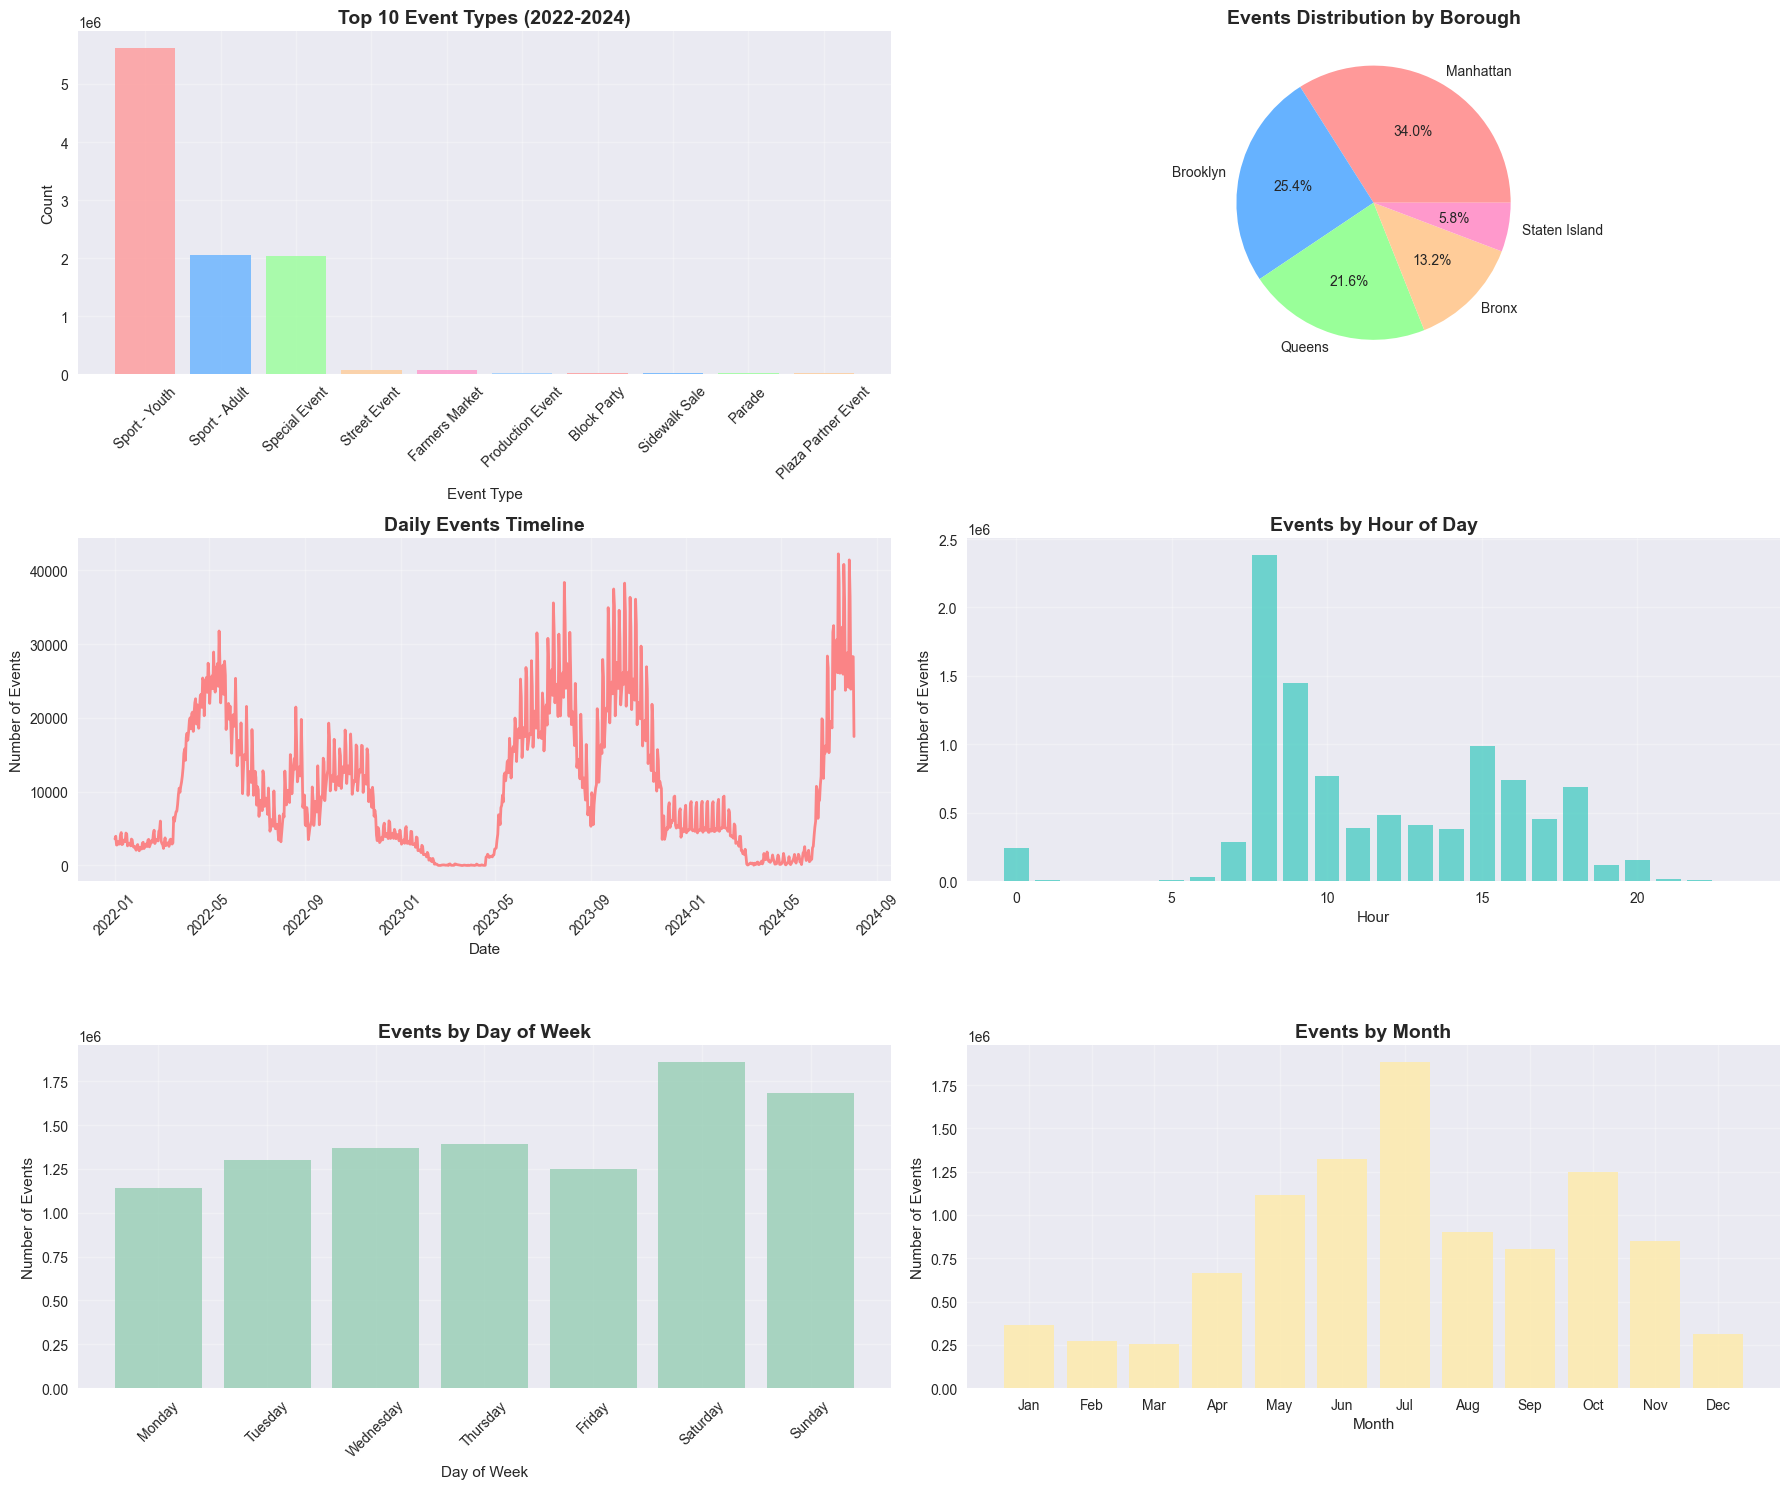


📊 EVENTS STATISTICAL SUMMARY:
   • Total Events: 10,000,000
   • Date Range: 2022-01-01 00:00:00 to 2024-08-02 15:00:00
   • Most Common Event Type: Sport - Youth (5626006 occurrences)
   • Most Common Event Type: Sport - Youth (5626006 occurrences)
   • Most Active Borough for Events: Manhattan
   • Most Active Borough for Events: Manhattan
   • Peak Event Hour: 8:00
   • Most Active Day: Saturday
   • Peak Event Hour: 8:00
   • Most Active Day: Saturday


In [53]:
# Events Analysis and Visualization
if not df_events.empty and 'start_date_time' in df_events.columns:
    print("📊 Creating Events Analysis Plots...")
    
    # Define colors for events
    event_colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC', '#99CCFF']
    
    # Create comprehensive events dashboard
    fig, axes = plt.subplots(3, 2, figsize=(18, 15))
    
    # 1. Events by type (Top 10)
    if 'event_type' in df_events.columns:
        event_type_counts = df_events['event_type'].value_counts().head(10)
        axes[0,0].bar(event_type_counts.index, event_type_counts.values, 
                     color=event_colors[:len(event_type_counts)], alpha=0.8)
        axes[0,0].set_title('Top 10 Event Types (2022-2024)', fontsize=14, fontweight='bold')
        axes[0,0].set_xlabel('Event Type')
        axes[0,0].set_ylabel('Count')
        axes[0,0].tick_params(axis='x', rotation=45)
        axes[0,0].grid(True, alpha=0.3)
    
    # 2. Events by borough
    if 'event_borough' in df_events.columns:
        event_borough_counts = df_events['event_borough'].value_counts()
        wedges, texts, autotexts = axes[0,1].pie(event_borough_counts.values, 
                                                labels=event_borough_counts.index, 
                                                autopct='%1.1f%%',
                                                colors=event_colors[:len(event_borough_counts)])
        axes[0,1].set_title('Events Distribution by Borough', fontsize=14, fontweight='bold')
    
    # 3. Daily Events Timeline
    daily_events = df_events.groupby(df_events['start_date_time'].dt.date).size()
    axes[1,0].plot(daily_events.index, daily_events.values, 
                  color='#FF6B6B', linewidth=2, alpha=0.8)
    axes[1,0].set_title('Daily Events Timeline', fontsize=14, fontweight='bold')
    axes[1,0].set_xlabel('Date')
    axes[1,0].set_ylabel('Number of Events')
    axes[1,0].tick_params(axis='x', rotation=45)
    axes[1,0].grid(True, alpha=0.3)
    
    # 4. Events by Hour of Day
    hourly_events = df_events['start_date_time'].dt.hour.value_counts().sort_index()
    axes[1,1].bar(hourly_events.index, hourly_events.values, 
                 color='#4ECDC4', alpha=0.8)
    axes[1,1].set_title('Events by Hour of Day', fontsize=14, fontweight='bold')
    axes[1,1].set_xlabel('Hour')
    axes[1,1].set_ylabel('Number of Events')
    axes[1,1].grid(True, alpha=0.3)
    
    # 5. Events by Day of Week
    df_events['event_day_of_week'] = df_events['start_date_time'].dt.day_name()
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    event_day_counts = df_events['event_day_of_week'].value_counts().reindex(day_order)
    axes[2,0].bar(event_day_counts.index, event_day_counts.values, 
                 color='#96CEB4', alpha=0.8)
    axes[2,0].set_title('Events by Day of Week', fontsize=14, fontweight='bold')
    axes[2,0].set_xlabel('Day of Week')
    axes[2,0].set_ylabel('Number of Events')
    axes[2,0].tick_params(axis='x', rotation=45)
    axes[2,0].grid(True, alpha=0.3)
    
    # 6. Monthly Events Distribution
    monthly_events = df_events['start_date_time'].dt.month.value_counts().sort_index()
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                  'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    axes[2,1].bar(range(1, len(monthly_events)+1), monthly_events.values, 
                 color='#FFEAA7', alpha=0.8)
    axes[2,1].set_title('Events by Month', fontsize=14, fontweight='bold')
    axes[2,1].set_xlabel('Month')
    axes[2,1].set_ylabel('Number of Events')
    axes[2,1].set_xticks(range(1, len(monthly_events)+1))
    axes[2,1].set_xticklabels([month_names[i-1] for i in monthly_events.index])
    axes[2,1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Statistical Summary
    print("\n📊 EVENTS STATISTICAL SUMMARY:")
    print(f"   • Total Events: {len(df_events):,}")
    print(f"   • Date Range: {df_events['start_date_time'].min()} to {df_events['start_date_time'].max()}")
    
    if 'event_type' in df_events.columns:
        print(f"   • Most Common Event Type: {df_events['event_type'].mode().iloc[0]} ({df_events['event_type'].value_counts().iloc[0]} occurrences)")
    
    if 'event_borough' in df_events.columns:
        print(f"   • Most Active Borough for Events: {df_events['event_borough'].mode().iloc[0]}")
    
    peak_hour = df_events['start_date_time'].dt.hour.mode().iloc[0]
    peak_day = df_events['start_date_time'].dt.day_name().mode().iloc[0]
    print(f"   • Peak Event Hour: {peak_hour}:00")
    print(f"   • Most Active Day: {peak_day}")

else:
    print("❌ No events data available for analysis")

In [16]:
# Summary Statistics
print("\n🎯 FINAL ANALYSIS SUMMARY (2022-2024)")
print("=" * 50)

print(f"\n📊 ARRESTS DATA:")
print(f"   • Total Arrests (Target Crimes): {len(df_arrests_filtered):,}")
print(f"   • Date Range: {df_arrests_filtered['arrest_date'].min().date()} to {df_arrests_filtered['arrest_date'].max().date()}")
print(f"   • Most Common Crime: {df_arrests_filtered['ofns_desc'].mode().iloc[0]} ({df_arrests_filtered['ofns_desc'].value_counts().iloc[0]:,} cases)")
print(f"   • Most Active Borough: {df_arrests_filtered['arrest_boro'].mode().iloc[0]}")

print(f"\n📅 YEARLY BREAKDOWN:")
for year, count in df_arrests_filtered['arrest_date'].dt.year.value_counts().sort_index().items():
    print(f"   • {year}: {count:,} arrests")

if not df_events.empty:
    print(f"\n🎪 EVENTS DATA:")
    print(f"   • Total Events: {len(df_events):,}")
    print(f"   • Date Range: {df_events['start_date_time'].min().date()} to {df_events['start_date_time'].max().date()}")
    if 'event_type' in df_events.columns:
        print(f"   • Most Common Event: {df_events['event_type'].mode().iloc[0]} ({df_events['event_type'].value_counts().iloc[0]:,} events)")
    
    print(f"\n📅 EVENTS YEARLY BREAKDOWN:")
    for year, count in df_events['start_date_time'].dt.year.value_counts().sort_index().items():
        print(f"   • {year}: {count:,} events")

print("\n✅ Analysis Complete!")


🎯 FINAL ANALYSIS SUMMARY (2022-2024)

📊 ARRESTS DATA:
   • Total Arrests (Target Crimes): 102,121
   • Date Range: 2022-01-01 to 2024-04-29
   • Most Common Crime: ASSAULT 3 & RELATED OFFENSES (76,306 cases)
   • Most Active Borough: K

📅 YEARLY BREAKDOWN:
   • 2022: 40,978 arrests
   • 2023: 45,305 arrests
   • 2024: 15,838 arrests

🎪 EVENTS DATA:
   • Total Events: 5,000,000
   • Date Range: 2022-01-01 to 2023-06-30
   • Most Common Event: Sport - Youth (2,815,661 events)

📅 EVENTS YEARLY BREAKDOWN:
   • 2022: 3,935,630 events
   • 2023: 1,064,370 events

✅ Analysis Complete!
   • Most Common Event: Sport - Youth (2,815,661 events)

📅 EVENTS YEARLY BREAKDOWN:
   • 2022: 3,935,630 events
   • 2023: 1,064,370 events

✅ Analysis Complete!


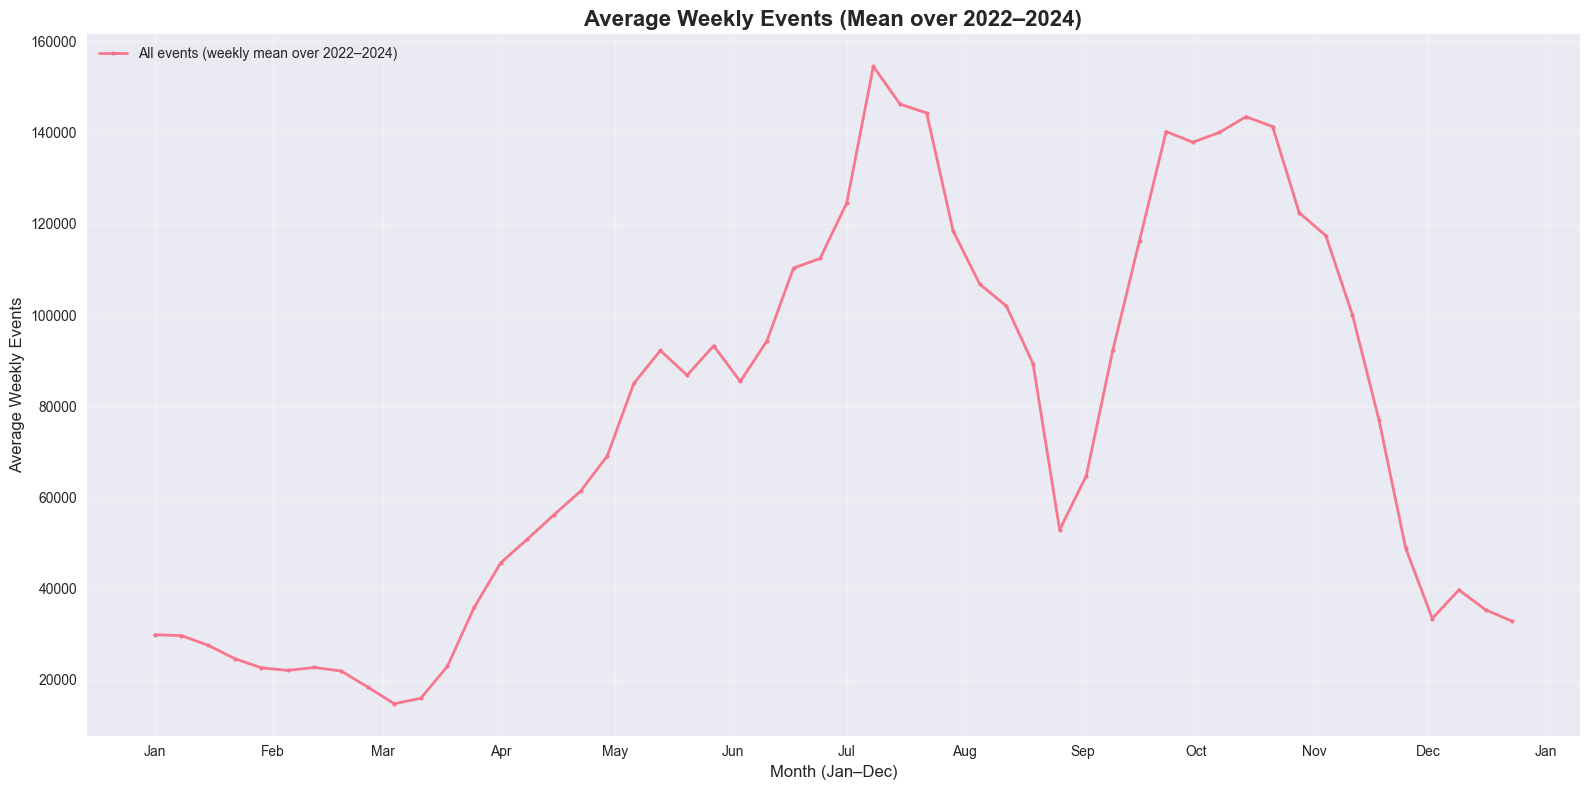

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# --- Einstellungen ---
YEARS = [2022, 2023, 2024]   # ggf. anpassen

# Kopie + sauberes Datumsfeld
ev = df_events.copy()
ev['start_date_time'] = pd.to_datetime(ev['start_date_time'], errors='coerce')
ev = ev.dropna(subset=['start_date_time'])

# ISO-Jahr/Woche
iso = ev['start_date_time'].dt.isocalendar()
ev['iso_year'] = iso.year
ev['iso_week'] = iso.week

# Auf gewünschte Jahre beschränken und nur KW 1..52 (vermeidet ISO-KW 53)
ev = ev[ev['iso_year'].isin(YEARS)]
ev = ev[ev['iso_week'] <= 52]

# Zählungen pro (Jahr, Woche)
weekly_counts = (
    ev.groupby(['iso_year', 'iso_week'])
      .size()
      .reset_index(name='events')
)

# Mittelwert über die Jahre je Woche
avg_by_week = (
    weekly_counts.groupby('iso_week')['events']
    .mean()
    .reindex(range(1, 53))
)

# X-Achse: Montagsdatum der ISO-Woche in Dummy-Jahr (nur für Labels)
week_dates = [pd.Timestamp.fromisocalendar(2024, w, 1) for w in range(1, 53)]

# Plot
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(
    week_dates,
    avg_by_week.values,
    linewidth=2,
    marker='o', markersize=3, alpha=0.95,
    label='All events (weekly mean over 2022–2024)'
)

ax.set_title('Average Weekly Events (Mean over 2022–2024)', fontsize=16, fontweight='bold')
ax.set_xlabel('Month (Jan–Dec)', fontsize=12)
ax.set_ylabel('Average Weekly Events', fontsize=12)

# X-Achse: Monats-Ticks
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.grid(True, alpha=0.25)
ax.legend(frameon=False, loc='upper left')

plt.tight_layout()
plt.show()
